In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/signal-cluster-classification-dataset/sample_submission.csv.csv
/kaggle/input/signal-cluster-classification-dataset/train.csv
/kaggle/input/signal-cluster-classification-dataset/test.csv


In [ ]:
train_df = pd.read_csv('/kaggle/input/signal-cluster-classification-dataset/train.csv')
test_df = pd.read_csv('/kaggle/input/signal-cluster-classification-dataset/test.csv')

In [ ]:
train_df.info

<bound method DataFrame.info of       sample_id  signal_strength  response_level category
0           901       722.566585      153.933763  Group_C
1          1799       210.432525      454.613761  Group_B
2          1129       152.569777      431.993189  Group_B
3           965       670.294068       -6.559720  Group_C
4           395        49.418875      444.775273  Group_B
...         ...              ...             ...      ...
1439       1131        -3.077336       89.943400  Group_A
1440       1295        -2.305414      480.309877  Group_B
1441        861       663.707807        6.368534  Group_C
1442       1460       433.427484      378.413460  Group_A
1443       1127        96.370956      460.536633  Group_B

[1444 rows x 4 columns]>

In [ ]:
train_df.head()

,sample_id,signal_strength,response_level,category
0,901,722.566585,153.933763,Group_C
1,1799,210.432525,454.613761,Group_B
2,1129,152.569777,431.993189,Group_B
3,965,670.294068,-6.559720,Group_C
4,395,49.418875,444.775273,Group_B


In [ ]:
train_df.category.value_counts()

category
Group_B    709
Group_C    481
Group_A    254
Name: count, dtype: int64

In [ ]:
train_df.category = train_df.category.map({'Group_C':2, 'Group_B':1, 'Group_A':0})

In [ ]:
train_df.columns

Index(['sample_id', 'signal_strength', 'response_level', 'category'], dtype='object')

In [ ]:
train_df.dtypes

sample_id            int64
signal_strength    float64
response_level     float64
category             int64
dtype: object

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


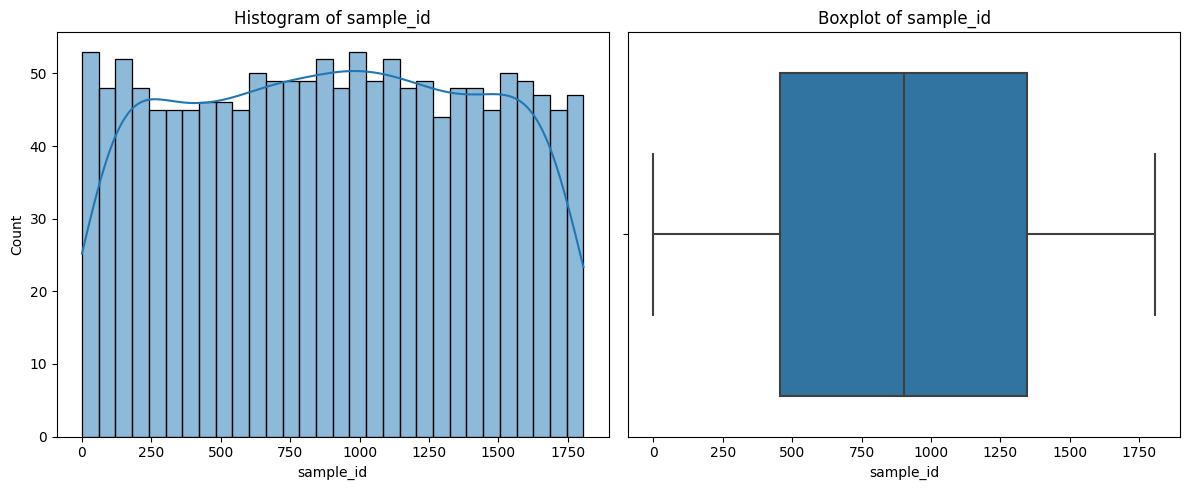

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


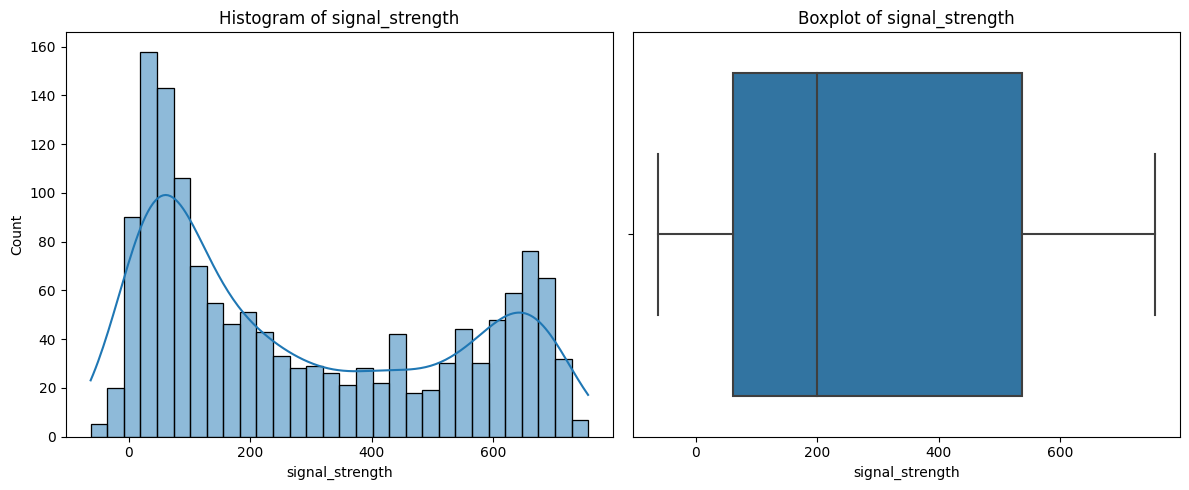

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


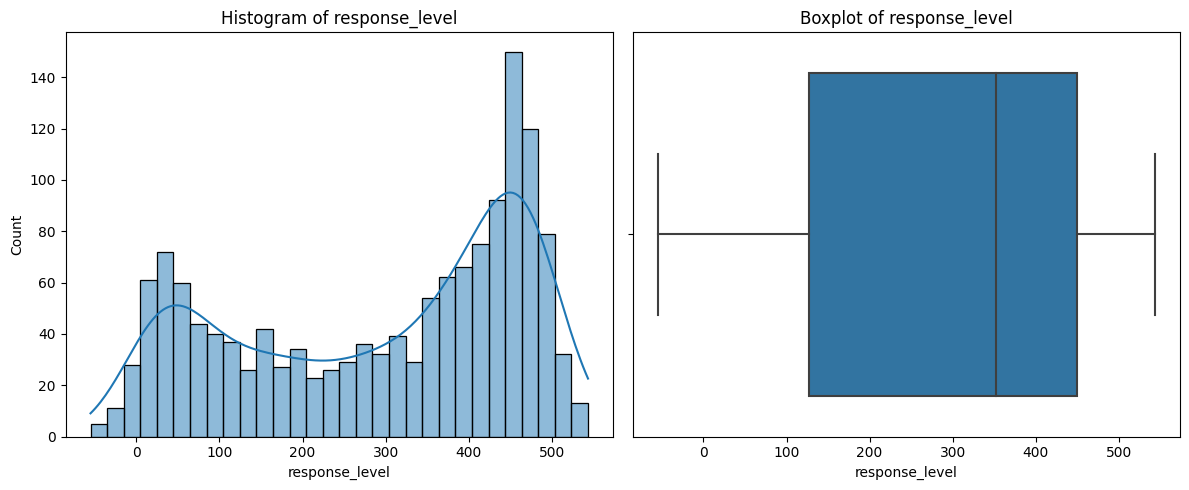

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


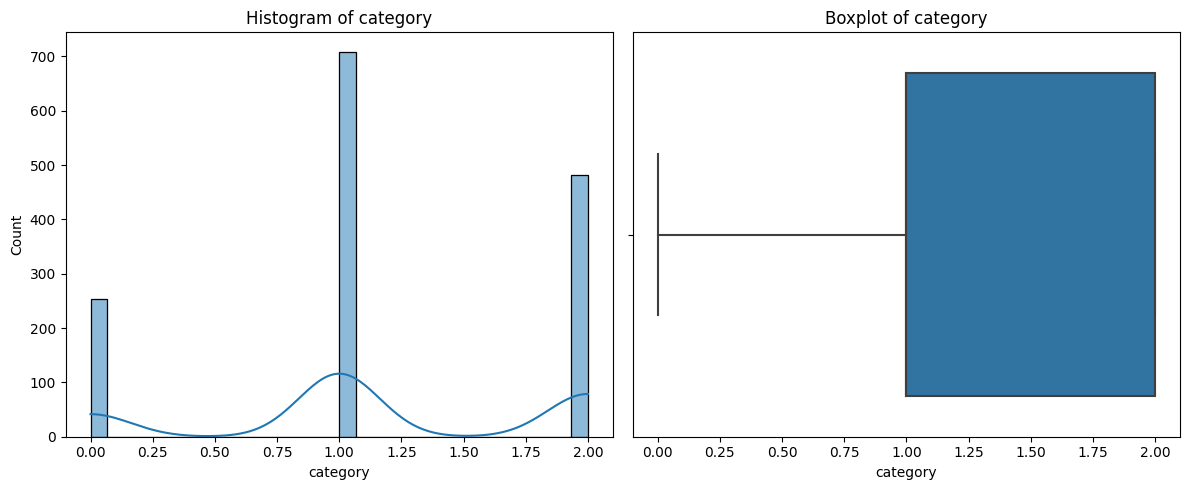

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = train_df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

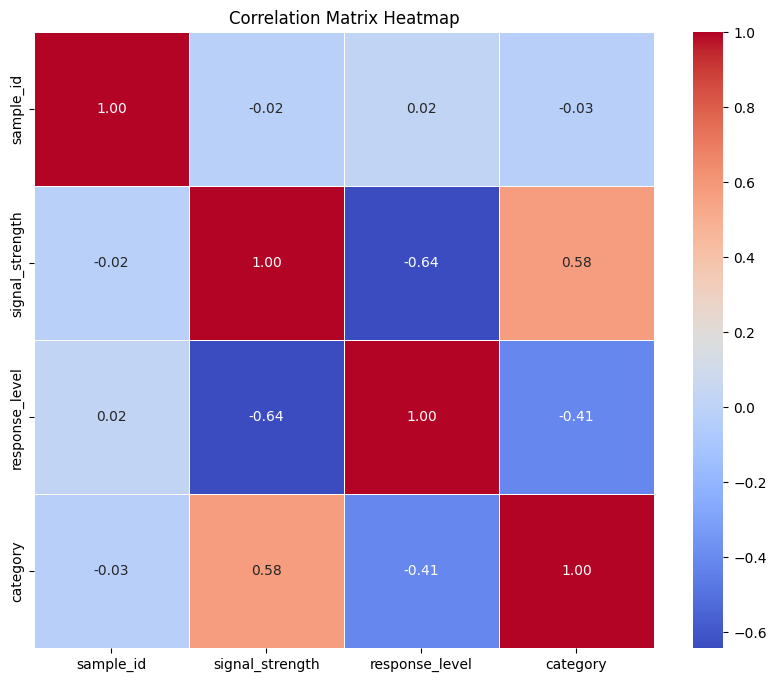

In [ ]:
corr_matrix = train_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X_train = train_df.drop(['category', 'sample_id'], axis = 1)
Y_train = train_df['category']
X_test = test_df.drop('sample_id', axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, Y_train, test_size=0.2, random_state=0, stratify=Y_train
)